In [26]:
'''
This code uses Python pandas and matplotlib libraries to visualize and analyze network performance of datasets from three CSV files. 
These files contain Thread, average latency and throughput values about disk performance on bare-metal servers, virtual machines (VMs), and containers. 
By using the head() function, it displays first 5 rows of the VM data. 
'''

import pandas as pd 
import matplotlib.pyplot as plt

baremetal_data = pd.read_csv('baremetal-disk-benchmark-results.csv')
vm_data = pd.read_csv('vm-disk-benchmark-results.csv')
container_data = pd.read_csv('container-disk-benchmark-results.csv')

vm_data.head()

,Thread,TotalOperations,Throughput
0,Thread_1,12978.25,50.70
1,Thread_2,29521.84,115.32
2,Thread_4,47767.18,186.59
3,Thread_8,85067.79,332.30
4,Thread_16,103157.18,402.96


In [27]:
# Here we are getting the columns inside vm_data

print(baremetal_data.columns)
print(vm_data.columns)
print(container_data.columns)

Index(['Thread', 'TotalOperations', 'Throughput'], dtype='object')
Index(['Thread', 'TotalOperations', 'Throughput'], dtype='object')
Index(['Thread', 'TotalOperations', 'Throughput'], dtype='object')


In [28]:
'''
The dataframe totalOperations has Thread, baremetalNetwork, vmNetwork and containerNetwork's total operations information.
It is used to build or generate a graph based on below dataframe columns.
'''

totalOperations = pd.DataFrame({
    "Thread" : baremetal_data['Thread'],
    "baremetalDisk":baremetal_data['TotalOperations'],
    "vmDisk":vm_data['TotalOperations'],
    "containerDisk":container_data['TotalOperations'],
})
totalOperations

,Thread,baremetalDisk,vmDisk,containerDisk
0,Thread_1,7880.77,12978.25,37990.37
1,Thread_2,15963.34,29521.84,70995.35
2,Thread_4,29184.44,47767.18,128270.72
3,Thread_8,47314.50,85067.79,129078.62
4,Thread_16,65851.77,103157.18,129609.87
5,Thread_32,78841.00,110752.90,128007.58
6,Thread_64,78842.74,134507.53,129198.60


In [29]:
'''
The dataframe throughput has Thread, baremetalNetwork, vmNetwork and containerNetwork's average latency information.
It is used to build or generate a graph based on below dataframe columns.
'''

throughput = pd.DataFrame({
    "Thread" : baremetal_data['Thread'],
    "baremetalDisk":baremetal_data['Throughput'],
    "vmDisk":vm_data['Throughput'],
    "containerDisk":container_data['Throughput'],
})
throughput

,Thread,baremetalDisk,vmDisk,containerDisk
0,Thread_1,30.78,50.70,148.40
1,Thread_2,62.36,115.32,277.33
2,Thread_4,114.00,186.59,501.06
3,Thread_8,184.82,332.30,504.21
4,Thread_16,257.23,402.96,506.29
5,Thread_32,307.97,432.63,500.03
6,Thread_64,307.98,525.42,504.68


#### The above bar graph shows threads vs. throughput (MiB/sec) in bare metal, container, and virtual machines.

range(0, 7)


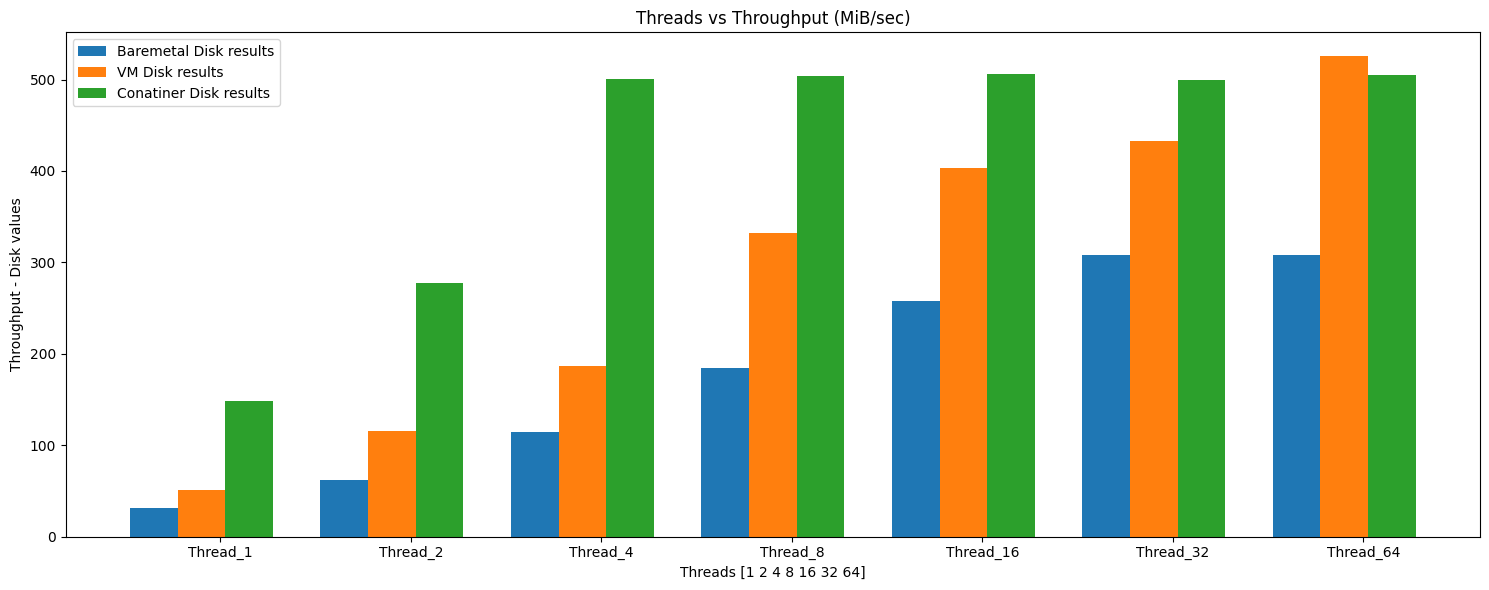

In [30]:
# The barWidth represents the width of each bar in the graph and the value is set to 0.25
# The gapWidth represents the space  between 1 thread information and the other thread information and the value is set to 0.1
# threadInfo is a variable which is used to compute and store the range of throughput['Thread']
# plt is a reference variable of matplotlib.
# figure initialize the new graph or figure and figsize -> width and height in inches.
# title is method which represents title in graph.
# xlabel is function which represents title of x-axis in graph.
# ylabel is function which represents title of y-axis in graph.
# bar is function which is used to generate a bargraph based on the x and y axis data .
# here I'm drawing 3 bars for 1 thread and 3 bars represents bare-metal, VM and container for each thread.
# xticks are used to label each thread with name and a rotation with 0
# legend function is used to represent each color with its definition
# tight_layout function is used for automatic adjustmentsof plots 

barWidth = 0.25
gapWidth = 0.1

threadInfo = range(len(throughput['Thread']))
print(threadInfo)
plt.figure(figsize=(15, 6))
plt.title("Threads vs Throughput (MiB/sec)")
plt.xlabel("Threads [1 2 4 8 16 32 64]")
plt.ylabel("Throughput - Disk values")

plt.bar(threadInfo, throughput['baremetalDisk'], barWidth, label="Baremetal Disk results")
plt.bar([i + barWidth   for i in threadInfo], throughput['vmDisk'], barWidth, label = "VM Disk results")
plt.bar([i + barWidth * 2  for i in threadInfo], throughput['containerDisk'], barWidth, label="Conatiner Disk results")

plt.xticks([i + barWidth + gapWidth for i in threadInfo], throughput['Thread'], rotation=0)

plt.legend()
plt.tight_layout()

#### The above bar graph shows threads vs. total operations in bare metal, container, and virtual machines.

range(0, 7)


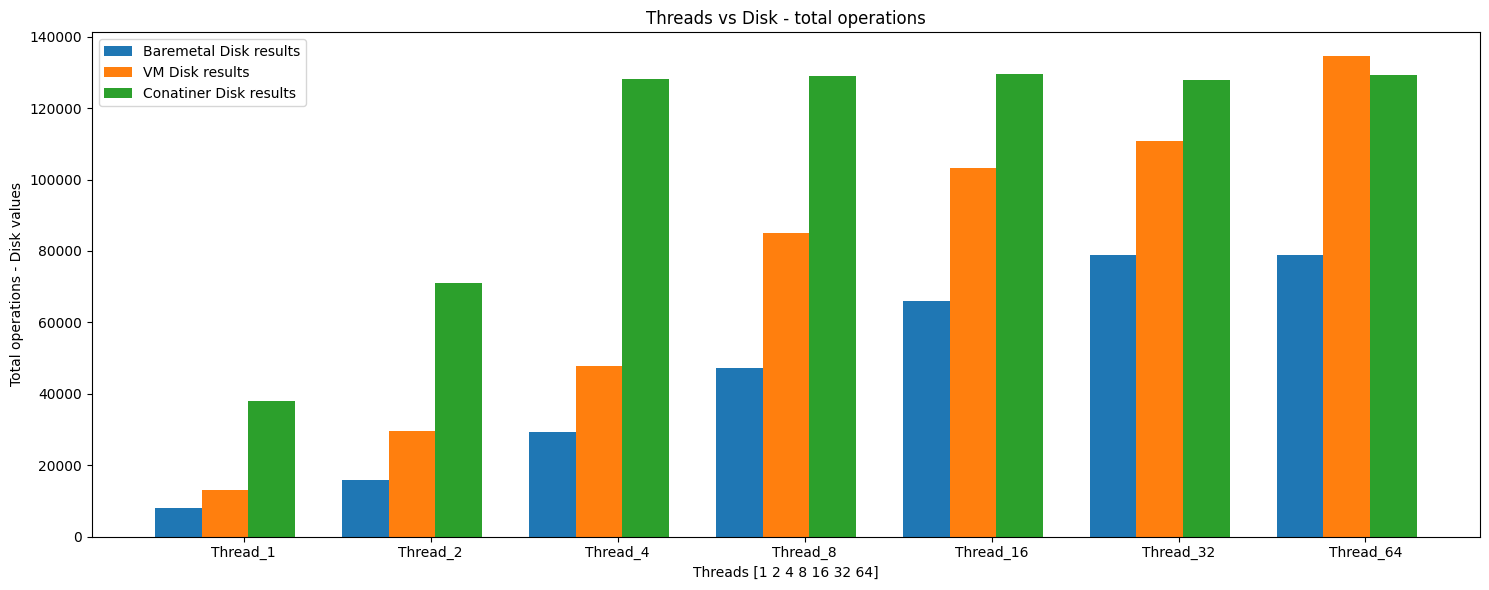

In [32]:
# The barWidth represents the width of each bar in the graph and the value is set to 0.25
# The gapWidth represents the space  between 1 thread information and the other thread information and the value is set to 0.1
# threadInfo is a variable which is used to compute and store the range of totalOperations['Thread']
# plt is a reference variable of matplotlib.
# figure initialize the new graph or figure and figsize -> width and height in inches.
# title is method which represents title in graph.
# xlabel is function which represents title of x-axis in graph.
# ylabel is function which represents title of y-axis in graph.
# bar is function which is used to generate a bargraph based on the x and y axis data .
# here I'm drawing 3 bars for 1 thread and 3 bars represents bare-metal, VM and container for each thread.
# xticks are used to label each thread with name and a rotation with 0
# legend function is used to represent each color with its definition
# tight_layout function is used for automatic adjustmentsof plots 

barWidth = 0.25
gapWidth = 0.1

threadInfo = range(len(totalOperations['Thread']))
print(threadInfo)
plt.figure(figsize=(15, 6))
plt.title("Threads vs Disk - total operations")
plt.xlabel("Threads [1 2 4 8 16 32 64]")
plt.ylabel("Total operations - Disk values")

plt.bar(threadInfo, totalOperations['baremetalDisk'], barWidth, label="Baremetal Disk results")
plt.bar([i + barWidth   for i in threadInfo], totalOperations['vmDisk'], barWidth, label = "VM Disk results")
plt.bar([i + barWidth * 2  for i in threadInfo], totalOperations['containerDisk'], barWidth, label="Conatiner Disk results")

plt.xticks([i + barWidth + gapWidth for i in threadInfo], totalOperations['Thread'], rotation=0)

plt.legend()
plt.tight_layout()